In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pylab as plt

def ReverseArrangement(smp, dirn=1):
    """
    smp assumed to be ordered
    """    
    # "A" from the murray paper
    if dirn > 0:
        A = [ np.sum(smp[i+1:] > smp[i], axis=0) for i in range(0, len(smp))]
    else:
        A = [ np.sum(smp[i+1:] < smp[i], axis=0) for i in range(0, len(smp))]
                 
    return np.atleast_1d(np.sum(A, axis=0))


# assume its sorted
data = pd.read_csv("~/data/esp_data_one_month_10_minute_interval.csv")

# update index to minutes since epoch
index = np.array([(dt.datetime.strptime(i, "%m/%d/%y %H:%M") - 
                    dt.datetime(1970,1,1)).total_seconds()/60 for i in data['DateTime'] ], 
                       dtype=np.int64)
data.index = index
data.drop('DateTime', 1, inplace=True)

# use pandas to create rolling window.
# FIXME - take ages because the function is too slow.
A = data.iloc[:500].rolling(100)
res = A.apply(ReverseArrangement)
# normalize to a value of 1 means "no trend" in an asymptotic sense.
res *= 4/(101.*100)



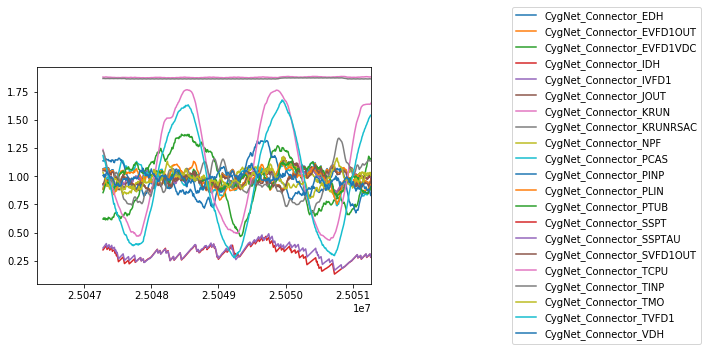

In [10]:
res.plot()
plt.legend(loc='center right', bbox_to_anchor=(2.0, 0.5))
plt.show()